# MNIST

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

2023-08-27 16:03:58.165260: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

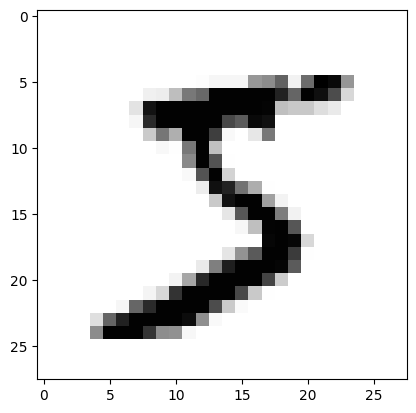

In [5]:
plt.imshow(X_train[0], cmap='Greys')

In [6]:
input_shape = X_train.shape[1:]

model = tf.keras.models.Sequential(
    name='MnistNN',
    layers=[
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

# optimizer: tf.keras.optimizers.Adam()
# loss: tf.keras.losses.categorical_crossentropy()
# categorical_crossentropy is the loss to use with multi-class classification
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "MnistNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
y_onehot_train = tf.one_hot(y_train, 10)
model.fit(X_train, y_onehot_train)

1875/1875 [==============================] - 2s 796us/step - loss: 9.7044 - accuracy: 0.8424


In [21]:
input_shape = X_train.shape[1:]

model = tf.keras.models.Sequential(
    name='MnistNN',
    layers=[
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(28, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

# sparse_categorical_crossentropy better to use this sparse one-hot encoded version of categorical crossentropy when possible
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "MnistNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dropout_1 (Dropout)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 28)                21980     
                                                                 
 dense_6 (Dense)             (None, 10)                290       
                                                                 
Total params: 22270 (86.99 KB)
Trainable params: 22270 (86.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, verbose=False)
# model.fit(X_train, y_train)
# model.fit(X_train, y_train, epochs=10, batch_size=200, validation_data=[X_test, y_test])

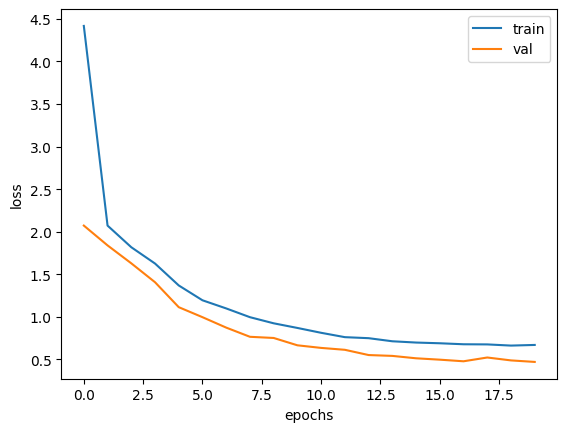

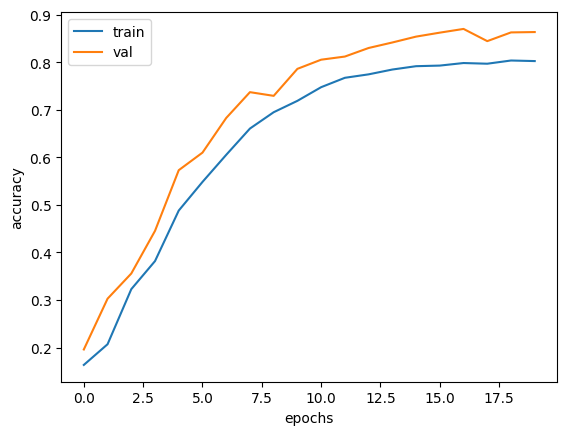

In [23]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show();

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show();

In [24]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 756us/step - loss: 0.4850 - accuracy: 0.8591


[0.4849621057510376, 0.8590999841690063]

313/313 [==============================] - 0s 608us/step
[2.7944831e-09 0.0000000e+00 4.3495062e-28 8.4448078e-07 3.0565778e-10
 3.8872603e-12 8.2975064e-36 9.9999899e-01 0.0000000e+00 1.6503938e-07] => 7


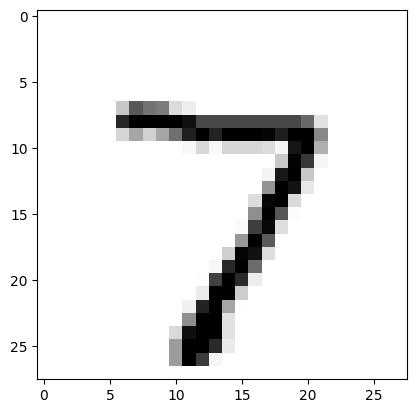

[6.4066183e-09 2.5457199e-05 9.9433428e-01 2.7584054e-03 1.0701108e-08
 4.2434654e-06 1.4388229e-07 1.5591875e-03 1.3181666e-03 2.2644745e-08] => 2


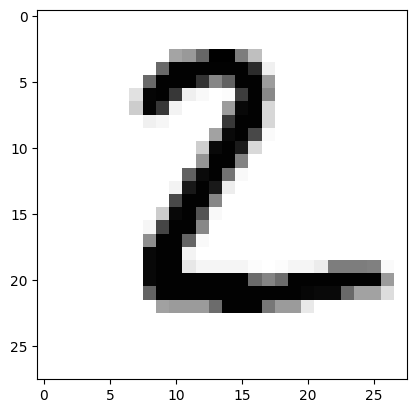

[6.01225565e-20 9.99761820e-01 1.36499594e-08 4.99432463e-06
 1.08764936e-04 1.27664930e-06 9.60345351e-05 3.53904829e-06
 2.05849847e-05 2.72816897e-06] => 1


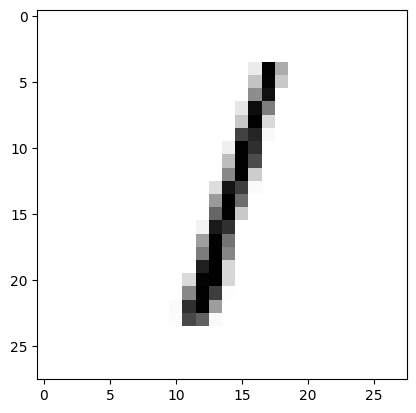

[9.7748482e-01 1.3015833e-04 3.8122217e-04 3.8251155e-03 1.9130400e-07
 1.4485814e-02 3.3724734e-03 8.8508832e-06 1.2314449e-04 1.8809088e-04] => 0


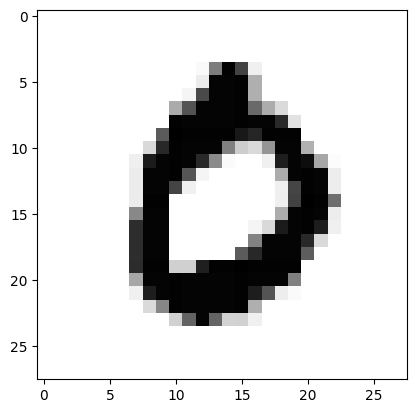

[1.11978396e-03 2.85678660e-03 7.01299170e-04 6.30059699e-03
 7.26174951e-01 4.09865864e-02 5.78716137e-02 6.03633584e-04
 1.20807745e-01 4.25770618e-02] => 4


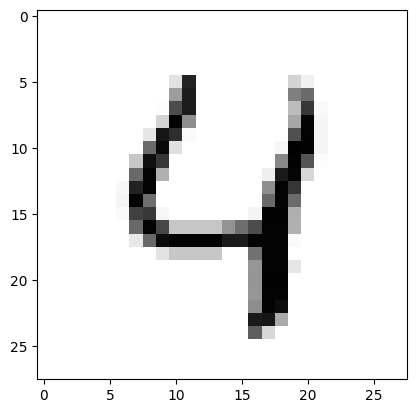

[1.3443926e-11 9.9993116e-01 4.2192304e-12 5.6623185e-07 4.5632238e-05
 1.3553944e-07 7.1909255e-08 4.3535092e-06 1.7219907e-05 9.4852754e-07] => 1


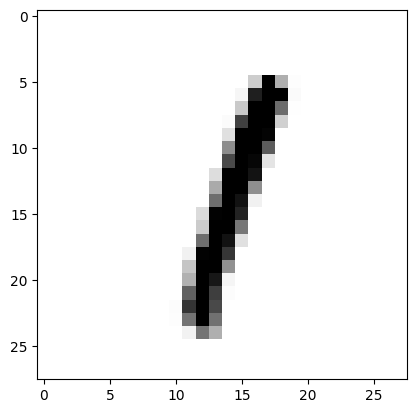

[5.9644726e-06 2.6764290e-04 6.0693839e-07 1.9776134e-03 8.5982376e-01
 2.2942740e-02 1.9558180e-04 5.6253766e-06 8.0103084e-02 3.4677375e-02] => 4


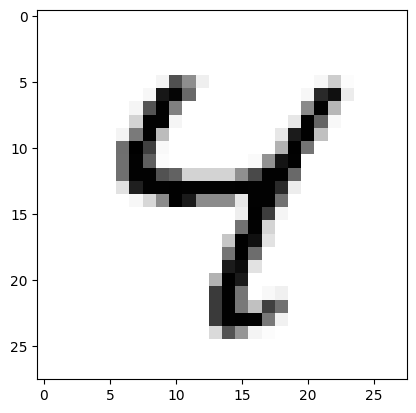

[4.8534021e-05 3.4911386e-04 2.9266605e-06 5.5183973e-03 2.4721660e-01
 8.6847675e-04 4.1536052e-10 7.5224107e-03 3.9040197e-03 7.3456955e-01] => 9


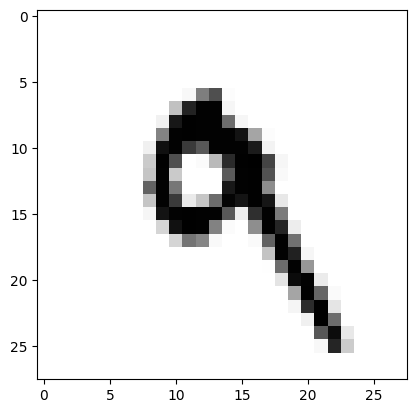

[0.00271884 0.00410597 0.0020324  0.00783967 0.63183373 0.04664235
 0.13443668 0.00119317 0.12552261 0.04367451] => 4


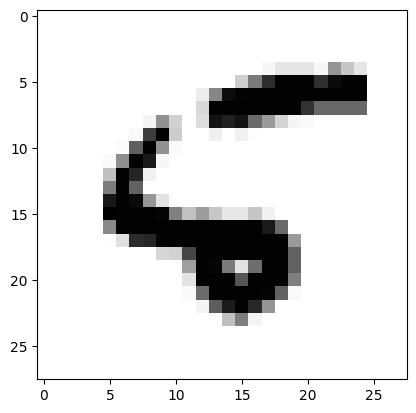

[1.0865783e-06 1.7824474e-05 1.4038200e-08 1.0285885e-03 2.8362468e-02
 1.5722962e-05 4.7242161e-16 6.5167202e-03 9.5087111e-05 9.6396250e-01] => 9


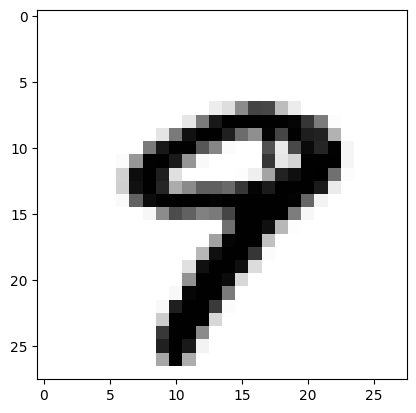

In [25]:
probs = model.predict(X_test)[:10]
preds = np.argmax(probs, axis=1)
for i in range(len(preds)):
    print(f'{probs[i]} => {preds[i]}')
    plt.imshow(X_test[i], cmap='Greys')
    plt.show();

In [28]:
input_shape = X_train.shape[1:]

model_mlp = tf.keras.models.Sequential(
    name='MnistNN',
    layers=[
        tf.keras.layers.Input(shape=input_shape),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(100, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(28, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax')
    ]
)

# sparse_categorical_crossentropy better to use this sparse one-hot encoded version of categorical crossentropy when possible
model_mlp.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_mlp.summary()

Model: "MnistNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dropout_5 (Dropout)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_11 (Dense)            (None, 28)                2828      
                                                                 
 dropout_7 (Dropout)         (None, 28)                0         
                                                                 
 dense_12 (Dense)            (None, 10)                290 

In [29]:
history_mlp = model.fit(X_train, y_train, epochs=20, batch_size=200, validation_data=[X_test, y_test], verbose=False)

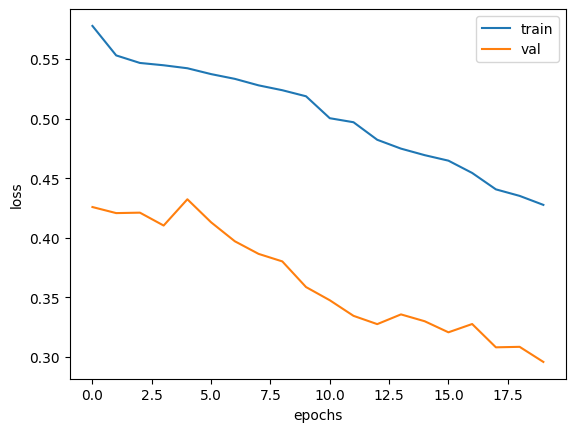

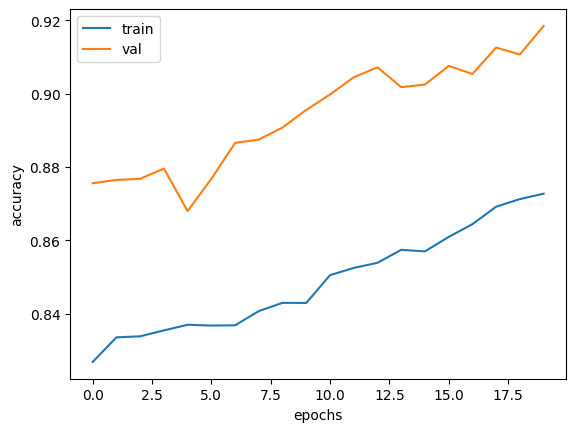

In [30]:
plt.plot(history_mlp.history['loss'], label='train')
plt.plot(history_mlp.history['val_loss'], label='val')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend()
plt.show();

plt.plot(history_mlp.history['accuracy'], label='train')
plt.plot(history_mlp.history['val_accuracy'], label='val')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show();

In [31]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 953us/step - loss: 0.2959 - accuracy: 0.9185


[0.29586100578308105, 0.9185000061988831]

313/313 [==============================] - 0s 818us/step
[3.49950935e-09 1.02711674e-07 3.38817517e-05 9.40773025e-05
 4.24219992e-09 2.39197584e-06 2.44898697e-23 9.99861717e-01
 8.33754044e-08 7.80109349e-06] => 7


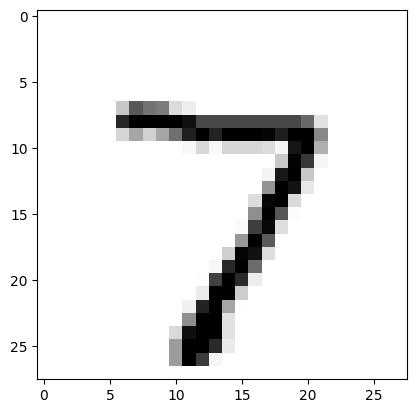

[2.6529265e-06 3.9738854e-03 9.8263204e-01 3.4105261e-03 8.9652514e-07
 1.4016098e-05 4.7411508e-05 7.1603991e-03 2.7580748e-03 7.9343806e-08] => 2


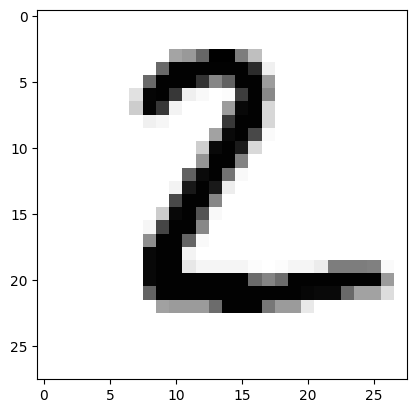

[3.3465135e-08 9.7946113e-01 7.1378776e-07 4.7834031e-04 2.3240168e-04
 1.4566216e-02 1.8950281e-04 7.3406572e-04 3.9141676e-03 4.2328515e-04] => 1


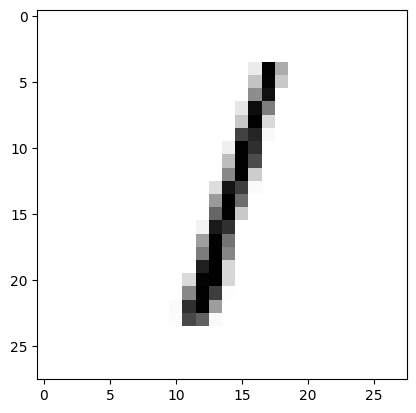

[9.9485207e-01 4.2805659e-06 1.5690403e-04 1.2590292e-04 2.3523295e-07
 4.1888929e-03 3.1774116e-04 8.7372191e-06 3.0688226e-04 3.8505663e-05] => 0


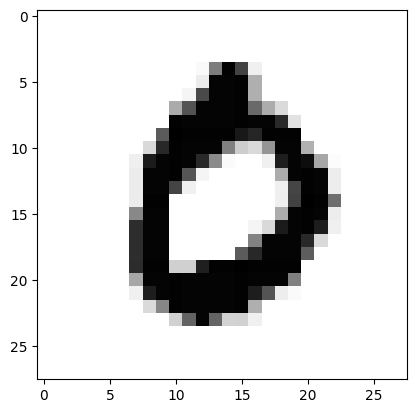

[3.5662142e-06 2.0885986e-06 4.7883380e-04 0.0000000e+00 9.8829722e-01
 1.2683920e-03 1.4098626e-05 8.6172740e-04 2.7770554e-34 9.0740994e-03] => 4


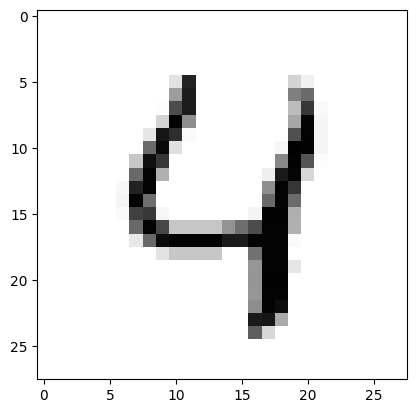

[4.0407554e-07 9.8167670e-01 2.8102229e-09 4.9562298e-04 3.2530654e-05
 1.3371827e-02 1.4430404e-09 1.6132016e-03 1.7021653e-03 1.1076370e-03] => 1


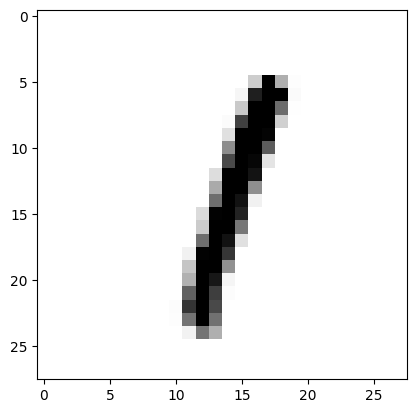

[6.4989986e-06 3.5117442e-05 5.2926857e-06 8.0808927e-12 9.5589024e-01
 9.8280730e-03 4.3566539e-05 7.6443568e-05 4.2123128e-07 3.4114387e-02] => 4


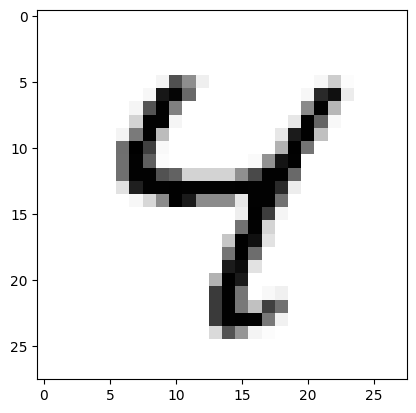

[3.38803511e-05 1.55734015e-04 1.00185716e-04 2.36153579e-03
 2.61899471e-01 4.45689168e-03 1.10981432e-07 1.23942066e-02
 2.09940914e-02 6.97603822e-01] => 9


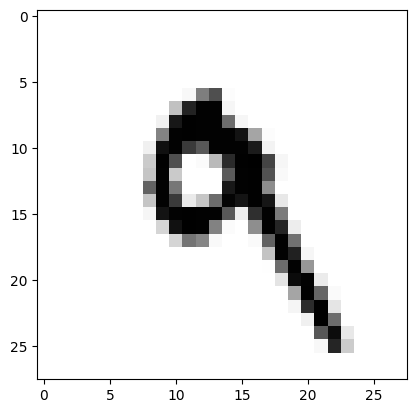

[1.3503239e-05 2.7363468e-04 1.9196201e-05 9.3038630e-05 6.0644397e-04
 2.2715887e-01 7.6640320e-01 1.7633813e-05 4.9692821e-03 4.4518680e-04] => 6


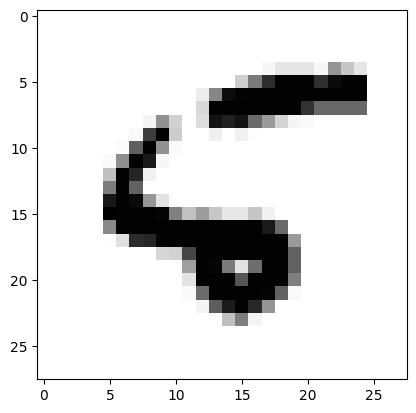

[1.2516065e-08 2.7282383e-08 3.7426107e-09 5.4730503e-05 1.3135032e-03
 1.2595737e-05 1.2951485e-18 6.0789287e-04 3.6024707e-04 9.9765098e-01] => 9


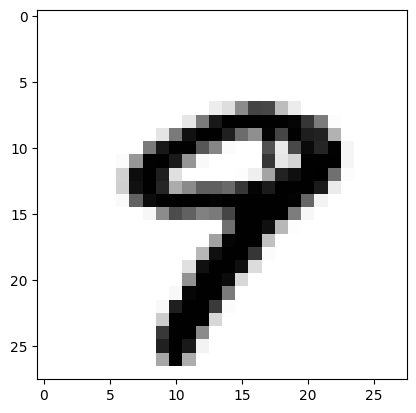

In [32]:
probs = model.predict(X_test)[:10]
preds = np.argmax(probs, axis=1)
for i in range(len(preds)):
    print(f'{probs[i]} => {preds[i]}')
    plt.imshow(X_test[i], cmap='Greys')
    plt.show();